In [192]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [193]:
data = np.loadtxt(os.path.join('glass.txt'), delimiter=",")
#print(data)
X = data[:, :9]
y = data[:, 1]
m = y.size
    
print('-'*26)
for i in range(m):
    print('{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:9.0f}{:11.0f}'.format(X[i, 0], X[i, 1],X[i, 2], X[i, 3],X[i, 4], X[i, 5],X[i, 6], X[i, 7], X[i, 8], y[i]))

--------------------------
        2       14        4        1       72        0        9        0        0         14
        2       14        4        1       73        0        8        0        0         14
        2       14        4        2       73        0        8        0        0         14
        2       13        4        1       73        1        8        0        0         13
        2       13        4        1       73        1        8        0        0         13
        2       13        4        2       73        1        8        0        0         13
        2       13        4        1       73        1        8        0        0         13
        2       13        4        1       73        1        8        0        0         13
        2       14        4        1       72        1        8        0        0         14
        2       13        4        1       73        1        8        0        0         13
        2       13        3        2       

In [194]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Composicion')
    pyplot.xlabel('Tipo de Vidrio')

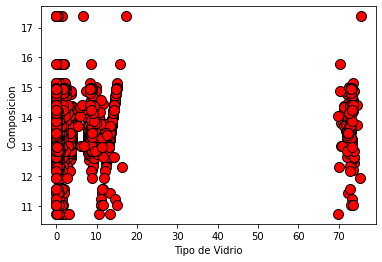

In [195]:
plotData(X, y)

In [196]:
X = np.concatenate([X, X * X], axis=1)

In [197]:
print(X)

[[ 1.52101 13.64     4.49    ... 76.5625   0.       0.     ]
 [ 1.51761 13.89     3.6     ... 61.3089   0.       0.     ]
 [ 1.51618 13.53     3.55    ... 60.5284   0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ... 71.2336   2.6896   0.     ]
 [ 1.51651 14.38     0.      ... 71.9104   2.4649   0.     ]
 [ 1.51711 14.23     0.      ... 74.3044   2.7889   0.     ]]


In [198]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [199]:
X_norm, mu, sigma = featureNormalize(X)

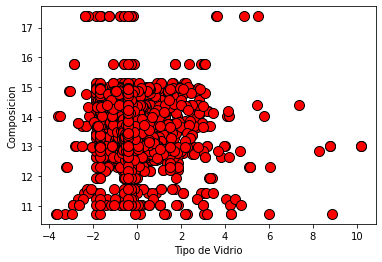

In [200]:
plotData(X_norm, y)

In [201]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [202]:
print(X)

[[ 1.          0.87286765  0.28495326 ... -0.19042369 -0.25459796
  -0.42425673]
 [ 1.         -0.24933347  0.59181718 ... -0.70175287 -0.25459796
  -0.42425673]
 [ 1.         -0.72131806  0.14993314 ... -0.72791669 -0.25459796
  -0.42425673]
 ...
 [ 1.          0.75404635  1.16872135 ... -0.36905838  2.22004713
  -0.42425673]
 [ 1.         -0.61239854  1.19327046 ... -0.34637078  2.01330533
  -0.42425673]
 [ 1.         -0.41436305  1.00915211 ... -0.26611942  2.311411
  -0.42425673]]


In [203]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [204]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.34072421e+01 -5.43747733e-03  3.73569832e-01 -7.41246480e-02
 -4.18706786e-02 -4.03458311e-02 -6.61492446e-02 -5.78462716e-02
  1.04114628e-03  9.01566909e-04 -5.53084666e-03  3.63467336e-01
 -4.29811657e-02 -7.16414215e-03 -4.01877227e-02  1.07054965e-02
 -6.28208043e-02 -3.87040522e-02 -7.05044385e-03]


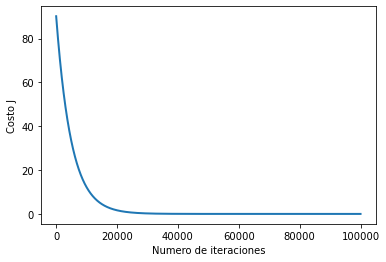

In [205]:
alpha = 0.0001
num_iters = 100000

theta = np.zeros(19)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

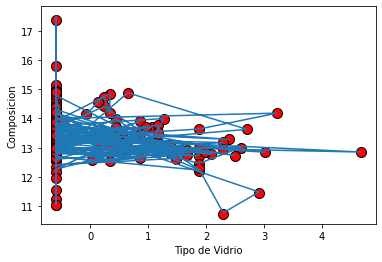

In [206]:
plotData(X[:, 9], y)
pyplot.plot(X[:, 9], np.dot(X, theta), '-')